# Ордена Трудового Красного Знамени
# Федеральное государственное бюджетное образовательное учреждение
# Высшего профессионального образования
# Московский технический университет связи и информатики

# Выполнила студентка группы БВТ2002 Быковская Арина Александровна


### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.


## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [1]:
27 - 13

14

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [21]:
%pylab inline  
# import almost all we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [3]:
import pandas as pd
df = pd.read_csv('data.csv')
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [4]:
#df = df.iloc[:] 
df['quantity'].sum()

4972

In [7]:
#2 Список уникальных товаров
(df.item_name.unique()) ## список уникальных товаров 

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [25]:
#2 Количество уникальных товаров
len(df.groupby('item_name').sum())

C:\Users\arina\AppData\Local\Temp\ipykernel_88996\1843065323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  len(df.groupby('item_name').sum())


50

Если учитывать тот факт, что у нас пара, в которой различие только "-", то можно сказать, что у нас получается 49 уникальных товаров

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [8]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [27]:
# your code
df.select_dtypes(include=['int64']).fillna(0)
df.select_dtypes(include=['object']).fillna('')

,item_name,choice_description,item_price
0,Chips and Fresh Tomato Salsa,,$2.39
1,Izze,[Clementine],$3.39
2,Nantucket Nectar,[Apple],$3.39
3,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...
4617,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [9]:
# функцию to_numeric невозможно реализовать из-за знака $ в стообце. Поэтому создадим функцию, которая убирает $. 
df['new_price']= df['item_price']
def convert_currency(value):
    new_value = value.replace('$','')
    return float(new_value)
df['new_price'] = df['new_price'].apply(convert_currency)
pd.to_numeric(df['new_price'])
df

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара? 

In [30]:
# your code
df['new_price'].mean()

7.464335785374297

In [31]:
# your code
df['new_price'].min()

1.09

In [32]:
df['new_price'].max()


44.25

Удалите старую колонку с ценой.

In [ ]:
df = df.drop(columns=['item_price'])
df
# удаление колонки item_price

#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по choice_description)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [12]:
# 5 самых дешёвых товаров
df2=df
df2['price_item1']=df2['new_price']/df2['quantity']
df2.sort_values(['price_item1', 'item_name'], ascending=[True, True],inplace=True)
df2.drop_duplicates(subset=['item_name'], keep='first').head(5)

,order_id,quantity,item_name,choice_description,new_price,price_item1
34,17,1,Bottled Water,NaN,1.09,1.09
18,9,2,Canned Soda,[Sprite],2.18,1.09
263,114,1,Canned Soft Drink,[Coke],1.25,1.25
6,3,1,Side of Chips,NaN,1.69,1.69
4509,1793,1,Chips,NaN,1.99,1.99


In [13]:
# 5 самых дорогих товаров
df3=df
df3['price_item1']=df3['new_price']/df3['quantity']
df3.sort_values(['price_item1', 'item_name'], ascending=[True, True],inplace=True)
df3.drop_duplicates(subset=['item_name'], keep='last').tail(5)

,order_id,quantity,item_name,choice_description,new_price,price_item1
4554,1810,1,Steak Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75
3710,1483,1,Steak Soft Tacos,"[Fresh Tomato Salsa, Guacamole]",11.75,11.75
3546,1426,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, Guacamole]",11.89,11.89
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89
4313,1720,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,11.89


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [14]:
df[(df['quantity']>1)&(df['item_name']=='Chicken Bowl')]['order_id'].count()

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [15]:
# средний чек каждого заказа
#df.groupby('order_id').mean()
df[['order_id','price_item1']].groupby('order_id').mean()

,price_item1
order_id,
1,2.890000
2,8.490000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


In [16]:
# round(data.groupby('order_id')['item_price'].sum().mean())
# round(data.groupby('order_id')['item_price'].count().mean())
# альтернативные варианты

In [18]:
# средний чек всех заказов
df.loc[:,"price_item1"].mean()

7.084424491562094

In [19]:
# сколько в среднем товаров покупают
df.loc[:,"quantity"].mean()

1.0757247944612722

#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [21]:
len(df.loc[df['quantity'] == 1])

4355

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [22]:
df.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

Ответ: Chicken Bowl

#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [32]:
np.random.seed(42) # зафиксируем случайные значения генератора
data_matrix = np.random.rand(10, 3)

In [33]:
dataframe = pd.DataFrame(data=data_matrix)
dataframe.columns = ['index', 'column1', 'column2']
dataframe.index = dataframe['index']
dataframe.drop('index', axis=1, inplace=True)
dataframe.head()

,column1,column2
index,,
0.374540,0.950714,0.731994
0.598658,0.156019,0.155995
0.058084,0.866176,0.601115
0.708073,0.020584,0.969910
0.832443,0.212339,0.181825


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [34]:
dataframe.to_csv('dataframe.csv', header=False, index=False) # сохраним Dataframe без индексов и названий

In [35]:
# проверим сохранение DataFrame
da = pd.read_csv('dataframe.csv', header=None)
da.head()

,0,1
0,0.950714,0.731994
1,0.156019,0.155995
2,0.866176,0.601115
3,0.020584,0.969910
4,0.212339,0.181825


## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

In [36]:
%matplotlib inline  
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [47]:
import datetime
import random

start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

C:\Users\arina\AppData\Local\Temp\ipykernel_85280\1026940251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_price = df.groupby('order_id').sum()['price_item1']
C:\Users\arina\AppData\Local\Temp\ipykernel_85280\1026940251.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price   = df.groupby('item_name').mean()['price_item1']


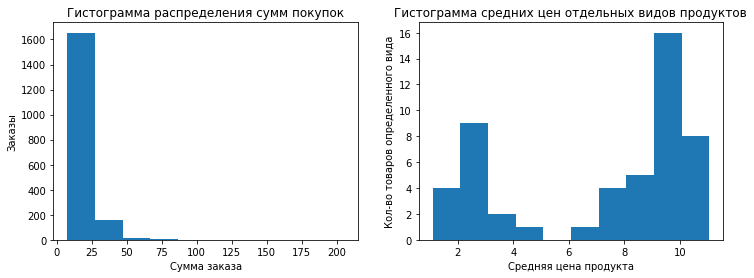

In [53]:
order_price = df.groupby('order_id').sum()['price_item1']
avg_price   = df.groupby('item_name').mean()['price_item1']
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes1.hist(order_price)
axes1.set_title('Гистограмма распределения сумм покупок')
axes1.set_xlabel('Сумма заказа')
axes1.set_ylabel('Заказы') 

axes2.hist(avg_price)
axes2.set_title('Гистограмма средних цен отдельных видов продуктов')
axes2.set_xlabel('Средняя цена продукта')
axes2.set_ylabel('Кол-во товаров определенного вида') 

plt.show()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

C:\Users\arina\AppData\Local\Temp\ipykernel_85280\3990789050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_price= df.groupby('date').sum()['price_item1']


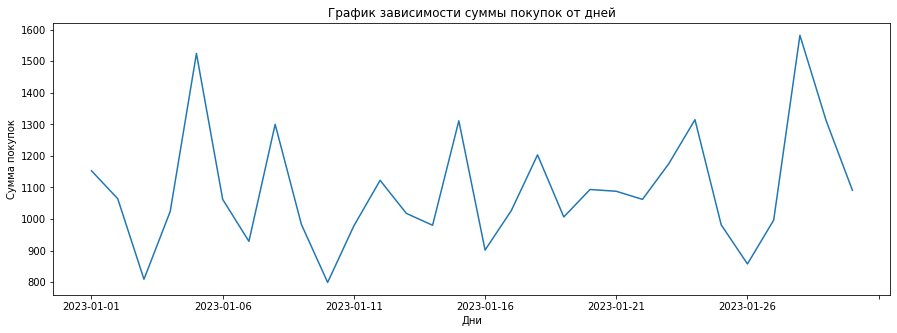

In [54]:
order_price= df.groupby('date').sum()['price_item1']
plt.figure(figsize=(15,5))
order_price.plot()
plt.title('График зависимости суммы покупок от дней')
plt.xlabel('Дни')
plt.ylabel('Сумма покупок') 
plt.show()

#### 3. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

C:\Users\arina\AppData\Local\Temp\ipykernel_85280\2094553768.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = df.groupby('order_id').sum()['quantity']
C:\Users\arina\AppData\Local\Temp\ipykernel_85280\2094553768.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_item = df.groupby('order_id').sum()['price_item1']


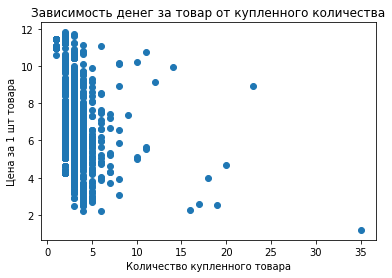

In [55]:
quantity = df.groupby('order_id').sum()['quantity']
price_item = df.groupby('order_id').sum()['price_item1']
avg_item=price_item/quantity


plt.scatter(quantity, avg_item)
plt.title('Зависимость денег за товар от купленного количества')
plt.xlabel('Количество купленного товара')
plt.ylabel('Цена за 1 шт товара')
plt.show() 

Сохраните график в формате pdf (так он останется векторизованным).

In [56]:
fig.savefig("scatter.pdf")

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 